# 🎚 ACF
Try guessing the full name... yeah give it a try. I am watching you 🤨 

> Okay it is: *Autocorrelation-function* <br>
It's fine if you didn't get it, or said: Autocovariance ... **FOCUS**! It is *Auto-Co**rrelation***! not Co***variance***!

######

## 🔎 We will search for the value of `q`
Previously we looked at the `ADF` test to determine the value of `d` parameter. Now it is the time to have a look at `q` parameter which if you remember is used in MA model. For MA(q).

## Autocovariance

Here, similar to *auto-covariance* we will find the *auto-correlation*. Which again is the ***"correlation of 2 different values from the same time-series"***.

# $$ cor(t_1, t_2) = \frac{cov(t_1, t_2)}{\sigma_{t_1}, \sigma_{t_2}}$$ 

# $$ cov(t_1, t_2) = (x - \bar x)(y - \bar y) $$

### But... how to get the correlation?
Not asking the formulae, that we already know... but the thing is that since we have **only one value to compare with one value** how are we supposed to get the correlation?

As we know, to get the correlation, we need more than 2 values at least. Meaning:

|        | **y1** | **y2** | **y3** | **y4** | **y5** |
|--------|--------|--------|--------|--------|--------|
| **v1** |   12   |   34   |   44   |   55   |   33   |
| **v2** |   13   |   44   |   43   |   12   |   44   |
| **v3** |    3   |   34   |   44   |   33   |   44   |

For each `y` value there should be *multiple versions* so that we can get the correlation. Now, you may ask this is possible in the seasonality! If we take suppose period as `12` say, then there are the ***versions*** of all values right?

That's what it does! The further explanation is below this section but based on the *period* ($\tau$) we will get the auto-correlation for each point and then divide by some value (which we will see in just a sec) and get ***whole autocorrelation*** for **that tau $\tau$**.

### Autocorrelation formulae:

The formulae *assumes* that the time-series is stationary. That means the mean and variance don't change over time. Thus, based on that *strong assumption* we will get our work done!

And the guyz behind the stats have given a ***rotated sigma*** symbol for the *autocorrelation* to distinguish it with the *simple correlation*! Which is: $\varrho$. Written in LaTeX as `\varrho`.

# $$ \varrho(\tau) = \frac{\displaystyle \sum_{t=1}^{T-\tau} (y_t - \mu) (y_{t + \tau} - \mu)} {(T - \tau)\sigma^2}$$ 

This is simple, <br>
**Numerator:** is simple autocovariance formula. That is for the 2 values on different time stamps. From 1 to $T-\tau$. <br>
**Denominator:** is also simple because that is just $T-\tau$ multiplied by $\sigma^2$.


After doing the math, you will find a **single number** between -1 and 1 as the measure of correlation for the given $\tau$. And we will take different values of $\tau$ from say 1 to 30. Meaning, the distance between $t_1$ and $t_2$ will be 1, then 2, till 30. And for each of those distances, we will get the *autocorrelation $\varrho$*.

> Plotting them on the graph will give us the ACF.

And, ***ACF is also known as <u>correlogram</u>.***

###### 

### 🤭 Is it that simple? 
Yeah! ACF is just the *plot* of a bunch of autocorrelations over the taus!

<img src="../images/acf.png" width=400 height=300>

- Note there, when the $\tau$ is 0, the $\varrho$ is 1. That makes sense because the correlation of same series with same series is just 1.
- When we use the ***lag*** meaning the $\tau$, the series is *shifted* by $\tau$ units and if then we find the $\varrho$ it gives different autocorrelation values.
- The **blue-region** in the plot is the confidence interval. The smaller is better. 
- That is found using the alpha value `0.05`. Thus, if any $\varrho$ gets outside of that region, then that $\varrho$ is by error. That is not reliable. But still there are 5% chances of that error to be made.

##### 🐾 Which value to choose then?
- We must choose the higher value for the $\tau$.
- But if we are getting low autocorrelation for the high $\tau$, then we should check for the $\tau$ before that.
- In short, we need to find the *peak* after which the autocorrelation falls.
- Here, we will choose the $\tau$ as `2`. Because after that all $\varrho$ are smaller.
- Since the $\varrho$ in 2 is **outside** of the confidence interval, we will keep that because there are no other values to keep which are high and inside the blue-region.
- If there were another high $\varrho$ but inside of the blue region, then we would have chosen that one instead of `2`. But here is not the case.

We will soon take the example to illustrate the same. 

#### Then what?
Great! You have your *optimal* `q`! Aren't you happy? You should be man! Now you've found the `q`. Let's see that in action in the code below.

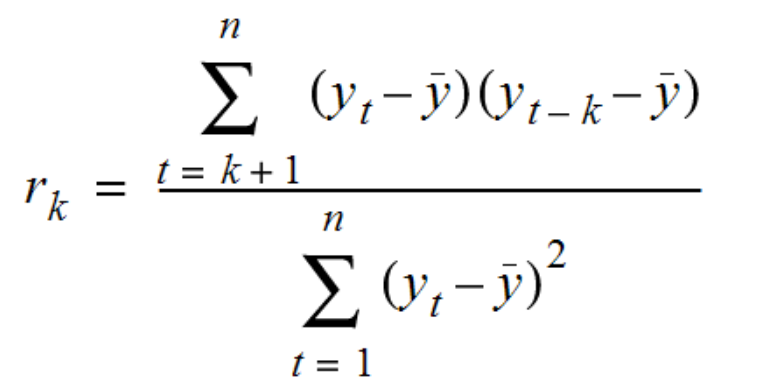

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../data/airline_passengers.csv", index_col=0)

In [86]:
df = df.dropna()

In [87]:
df = df.iloc[:, 1]

In [ ]:
tao = 1

corrs = []
while tao < 50:
    X = []
    y = []
    for i in range(df.shape[0] - tao):
        X.append(df.iloc[i])
        y.append(df.iloc[i+tao])
    
    corrs.append(pd.Series(X).corr(pd.Series(y)))
    tao += 1

In [111]:
from statsmodels.graphics.tsaplots import plot_acf

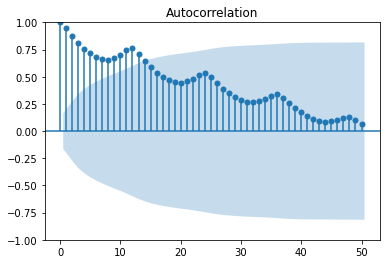

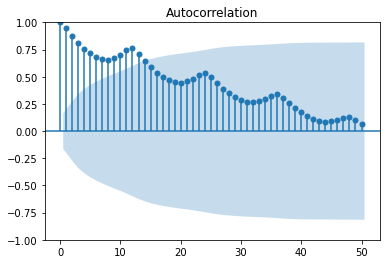

In [112]:
plot_acf(df, lags=50)
# plt.ylim([0, 1])

<BarContainer object of 49 artists>

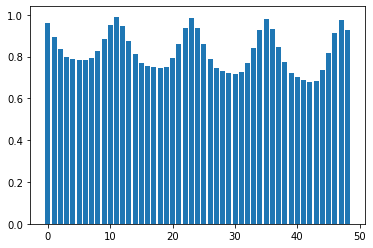

In [113]:
plt.bar(range(len(corrs)), corrs)